In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

5


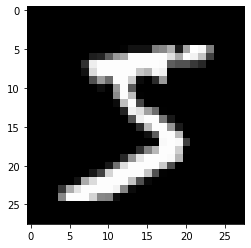

In [3]:
train_data, test_data = tf.keras.datasets.mnist.load_data(path="mnist.npz")
x_train = train_data[0].reshape(-1,784).astype(float) / 255
y_train = train_data[1]
print(y_train[0])
plt.imshow(train_data[0][0], cmap='gray')

In [156]:
# source: https://keras.io/guides/training_with_built_in_methods/

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(32, activation="relu", name="dense_1")(inputs)
x = layers.Dense(32, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation=None, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#def loss(true, pred):
#    val = 0.
#    for i in range(len(true)):
#        val -= np.log(pred[i, true[i]])
#    return val / len(true)
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 digits (InputLayer)         [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 32)                25120     
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [157]:
# untrained model
logits = model(x_train)
np.argmax(logits, 1)[0:100]

array([2, 2, 1, 1, 1, 1, 5, 9, 2, 2, 7, 1, 7, 5, 2, 1, 1, 1, 1, 5, 1, 5,
       1, 1, 2, 8, 1, 9, 2, 2, 1, 1, 2, 1, 0, 2, 1, 7, 9, 2, 2, 2, 4, 2,
       5, 2, 1, 2, 2, 3, 5, 9, 9, 2, 9, 2, 5, 1, 1, 3, 2, 2, 1, 2, 7, 1,
       1, 2, 2, 0, 2, 1, 2, 1, 7, 2, 3, 3, 2, 1, 1, 5, 2, 2, 9, 1, 5, 5,
       4, 2, 1, 6, 1, 1, 2, 2, 2, 1, 0, 2], dtype=int64)

In [158]:
# what we would like to get
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [159]:
## Computing a stochastic gradient

# Source: https://keras.io/guides/writing_a_training_loop_from_scratch/

# Example of gradient computation using automatic differentiation

x_train_batch = x_train[:8]
y_train_batch = y_train[:8]
with tf.GradientTape() as tape:
        # Run the forward pass of the layer.
        # The operations that the layer applies
        # to its inputs are going to be recorded
        # on the GradientTape.
        logits = model(x_train_batch)  # Logits for this minibatch

        # Compute the loss value for this minibatch.
        loss_value = loss(y_train_batch, logits)

# Use the gradient tape to automatically retrieve
# the gradients of the trainable variables with respect to the loss.
grad = tape.gradient(loss_value, model.trainable_variables)

## Updating weights

def update_weights(model, update):
    new_weights = model.trainable_weights.copy()
    for i in range(len(new_weights)):
        new_weights[i] = new_weights[i] + update[i]
    model.set_weights(new_weights)


## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()
    

2.2871685

#### Question 4.1

#### We need 26 506 optimization variables

### (5) Stochastic gradient descent

#### Question 5.1

In [160]:
# Stochastic gradient algorithm

def train_neural_network(x_train, y_train, model, learning_rate, num_epochs):
    losses = []
    for epoch in range(num_epochs):
        for i, x in enumerate(x_train):
            with tf.GradientTape() as tape:
                y_pred = model(np.array([x]))
                val_loss = loss(y_train[i],y_pred)
            grads = tape.gradient(val_loss, model.trainable_variables)
            losses.append(val_loss)
            
            # Update model parameters using SGD
            update_weights(model, [-learning_rate*grad for grad in grads])
            """params, n = model.trainable_variables.copy(), 0
            for param, grad in zip(model.trainable_variables, grads):
                params[n] = param - learning_rate * grad
                n+=1
            model.set_weights(params)"""
            
            if i%1000 == 0:
                print(i, val_loss)
                
    return losses

#### Question 5.2

In [161]:
# Run the algorithm for one epoch and with a learning rate that satisfies the conditions required by theory
losses = train_neural_network(x_train, y_train, model, 0.01, 1)

# Plot the objective value as a function of the iterations
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.show()

0 tf.Tensor(2.2458735, shape=(), dtype=float32)
1000 tf.Tensor(0.22194426, shape=(), dtype=float32)
2000 tf.Tensor(1.8339624, shape=(), dtype=float32)
3000 tf.Tensor(1.3936731, shape=(), dtype=float32)
4000 tf.Tensor(0.011988493, shape=(), dtype=float32)


KeyboardInterrupt: 

### (6) Empirical risk minimization

#### Question 6.1

In [131]:
# Define the optimization algorithm
optimizer = keras.optimizers.SGD(learning_rate=0.01)

# Number of epochs to run
num_epochs = 1

# Loop over the number of epochs
for epoch in range(num_epochs):
    # Loop over each sample in the training data
    for i, x in enumerate(x_train):
        with tf.GradientTape() as tape:
            # Make a prediction for a single sample
            y_pred = model(np.array([x]))
            
            # Calculate the loss for this sample
            loss_value = loss(y_train[i], y_pred)
        
        # Calculate the gradients with respect to the parameters
        grads = tape.gradient(loss_value, model.trainable_variables)
        
        # Update the parameters using SGD
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
    print(f"Epoch {epoch}: Loss = {loss_value}")

KeyboardInterrupt: 

### Question 6 : Empirical risk minimization

In [10]:
# Define the optimization algorithm
optimizer = keras.optimizers.SGD(learning_rate=0.01)

# Number of epochs to run
num_epochs = 10

# Loop over the number of epochs
for epoch in range(num_epochs):
    # Loop over each sample in the training data
    for i, x in enumerate(x_train):
        with tf.GradientTape() as tape:
            # Make a prediction for a single sample
            y_pred = model(np.array([x]))
            
            # Calculate the loss for this sample
            loss_value = loss(y_train[i], y_pred)
        
        # Calculate the gradients with respect to the parameters
        grads = tape.gradient(loss_value, model.trainable_variables)
        
        # Update the parameters using SGD
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
    print(f"Epoch {epoch}: Loss = {loss_value}")

Epoch 0: Loss = 0.00112255965359509
Epoch 1: Loss = 0.0015922023449093103
Epoch 2: Loss = 0.0004503904783632606
Epoch 3: Loss = 0.00019905969384126365
Epoch 4: Loss = 8.761498611420393e-05
Epoch 5: Loss = 3.659658250398934e-05
Epoch 6: Loss = 5.245071224635467e-05
Epoch 7: Loss = 0.0016662298003211617
Epoch 8: Loss = 0.00043501926120370626
Epoch 9: Loss = 2.264974000354414e-06


Super long à tourner...

#### Question 6.2

Using a batch of samples in gradient descent algorithms, such as batch gradient descent or mini-batch gradient descent, has several advantages over using a single sample (stochastic gradient descent):

    (1) Faster convergence: Using a batch of samples to compute the gradients provides a more accurate estimate of the gradient, leading to faster convergence and better optimization results.

    (2) Better use of hardware resources: Processing a batch of samples at once can be more computationally efficient than processing a single sample at a time, as it can take advantage of parallel processing and vectorization hardware.

    (3) Regularization: Using a batch of samples instead of a single sample can help reduce overfitting, as the model's parameters are updated based on the average gradient over the entire batch. This provides a form of regularization that can help prevent overfitting.

#### Question 6.3

In [18]:
# Define the optimization algorithm
optimizer = keras.optimizers.SGD(learning_rate=0.01)

# Number of epochs to run
num_epochs = 10

# Batch size
batch_size = 32

# Loop over the number of epochs
for epoch in range(num_epochs):
    # Loop over each batch in the training data
    for i in range(0, len(x_train), batch_size):
        x_batch = x_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size]
        
        with tf.GradientTape() as tape:
            # Make predictions for a batch of samples
            y_pred = model(np.array(x_batch))
            
            # Calculate the loss for this batch
            loss_value = loss(y_batch, y_pred)
        
        # Calculate the gradients with respect to the parameters
        grads = tape.gradient(loss_value, model.trainable_variables)
        
        # Update the parameters using SGD
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
    print(f"Epoch {epoch}: Loss = {loss_value}")

Epoch 0: Loss = 0.18711067736148834
Epoch 1: Loss = 0.13649453222751617
Epoch 2: Loss = 0.10861142724752426
Epoch 3: Loss = 0.09280143678188324
Epoch 4: Loss = 0.08049016445875168
Epoch 5: Loss = 0.0690719410777092
Epoch 6: Loss = 0.06171197444200516
Epoch 7: Loss = 0.05560793727636337
Epoch 8: Loss = 0.050929367542266846
Epoch 9: Loss = 0.04819677397608757


### (7) Evaluation of the model

#### Question 7.1

In [19]:
## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()

0.17605954

In [ ]:
## Evaluate model
samples_for_evaluation = np.random.randint(0, 10000, 1000)
logits = model(x_train[samples_for_evaluation])
loss(y_train[samples_for_evaluation], logits).numpy()